In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read csv file
df = pd.read_csv("29286875.csv")

In [19]:
# change the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(n=3)

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
0,ID5174772222,2.0,1.0,43.632,47.0,3.0,-37.355446,145.140356,-36.683571,147.271147,203.610,2018-03-24,03:47:54,163.99,6:31:53,187.16
1,ID1302741470,2.0,0.0,14.230,42.0,45.0,-38.029425,146.072856,-38.880642,145.089798,127.756,2018-04-01,19:00:04,105.65,20:45:43,132.04
2,ID1271333154,1.0,0.0,31.700,19.0,8.0,-38.467031,144.056414,-37.882256,147.344381,294.983,2018-04-27,01:05:05,240.38,5:05:27,122.90


In [24]:
# df
df['id'] = df['id'].str.replace('ID', '')
df = df.dropna(subset=['id'])
# df[1]['id']

In [26]:
df['id'] = df['id'].astype(int)

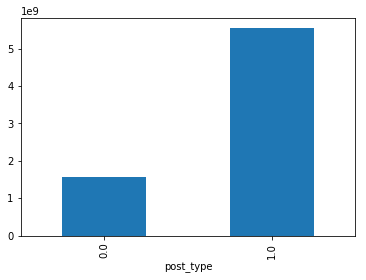

In [27]:
# there is the relationship between fare and post type
df.groupby('post_type')['id'].mean().plot(kind='bar')
plt.show()

In [3]:
df.isnull().sum()

id                       25
drone_type               10
post_type                20
package_weight            0
origin_region            10
destination_region       10
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

In [4]:
df[df['id'].isnull()]

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
39055,NaN,2.0,0.0,14.297,25.0,19.0,-37.793646,145.590877,-38.312651,144.088551,143.801,2018-02-07,20:55:48,117.99,22:53:47,129.63
39056,NaN,1.0,0.0,17.819,46.0,32.0,-37.301458,145.742800,-37.251962,143.940644,159.723,2018-02-12,10:25:31,133.60,12:39:06,82.91
39063,NaN,1.0,0.0,26.403,20.0,9.0,-38.286967,146.682079,-36.816327,144.380226,260.882,2018-03-03,14:41:07,213.46,18:14:34,112.70
39064,NaN,2.0,1.0,42.986,51.0,32.0,-38.994409,148.331082,-37.278044,144.056082,420.180,2018-04-08,07:35:55,330.59,13:06:30,178.55
39067,NaN,1.0,0.0,8.484,50.0,50.0,-38.720234,142.877250,-38.786487,142.863125,7.476,2018-05-12,08:38:42,13.40,8:52:06,67.14
39068,NaN,1.0,0.0,25.967,46.0,14.0,-37.347072,145.750609,-37.147728,146.633785,81.345,2018-05-19,05:18:19,71.72,6:30:02,107.31
39069,NaN,2.0,1.0,11.690,35.0,33.0,-36.678079,144.992479,-36.563472,143.660760,119.661,2018-05-26,07:09:57,99.42,8:49:22,151.46
39075,NaN,1.0,0.0,36.169,13.0,47.0,-38.527853,147.316593,-37.297172,145.057392,241.099,2018-01-21,16:56:15,197.84,20:14:05,108.43
39078,NaN,1.0,0.0,32.805,22.0,9.0,-38.563050,146.057509,-36.785964,144.201513,256.645,2018-02-07,16:08:23,210.11,19:38:29,110.20
39082,NaN,1.0,1.0,23.489,2.0,49.0,-37.013047,143.698701,-38.213033,143.728877,133.605,2018-01-16,05:48:44,112.98,7:41:42,147.54


In [5]:
# True equal 1 so can use sum to check how many True in this series
# 發現包含 id 是 NaN 值的 rows（在移出id這個column後），總共有 60 個 duplicate
copy_no_id_df = df.drop(['id'], axis=1)
sum(copy_no_id_df.duplicated())
# copy_no_id_df.duplicated()

60

In [6]:
# keep='first'：除了第一次出現外，其餘相同的被標記為重複(default 跟 keep='first' 結果一樣)
# 原始的所有rows（還未移除id這個column前），總共有 35 個 duplicate
sum(df.duplicated()) # there are 35 duplicate rows
# df.duplicated()

35

In [7]:
# 驗證 id 是 NaN 值的有 25 筆資料沒錯
sum(copy_no_id_df.duplicated()) - sum(df.duplicated())

25

In [10]:
sum(df.index.duplicated()) # there is no duplicate index

0

In [11]:
# df[df.duplicated()] # 獲取重複紀錄行

In [12]:
df[df['id'] == 'ID1520168285'] # 抓一筆重複行出來，再次確認是否重複，發現真的是重複

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
32583,ID1520168285,2.0,0.0,7.338,18.0,25.0,-38.894488,143.799138,-37.773203,145.794381,214.31,2018-01-10,21:53:42,172.23,0:45:55,145.37
39053,ID1520168285,2.0,0.0,7.338,18.0,25.0,-38.894488,143.799138,-37.773203,145.794381,214.31,2018-01-10,21:53:42,172.23,0:45:55,145.37


In [13]:
# df[~df.index.duplicated('last')] # 獲取不重複紀錄行

In [14]:
drop_id_duplicate_df = df.drop_duplicates()

In [15]:
# 0 duplicate row
sum(drop_id_duplicate_df.duplicated())

0

In [17]:
len(drop_id_duplicate_df.index)

39078

In [19]:
# Drop only if NaN in id column
drop_id_duplicate_and_nan_df = drop_id_duplicate_df.dropna(subset=['id'])

In [20]:
# no duplicate, no NaN in 'id' column now
len(drop_id_duplicate_and_nan_df.index)

39053